In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

The files have been arranged as per the stores. The small script for the same is attached in the mail.


In [2]:
shop1 = pd.read_csv('Store 1.csv')
shop2 = pd.read_csv('Store 2.csv')
shop3 = pd.read_csv('Store 3.csv')
shop4 = pd.read_csv('Store 4.csv')
shop5 = pd.read_csv('Store 5.csv')
shop6 = pd.read_csv('Store 6.csv')

If one sees the bill numbers are not in tandem with the date. Look at the entry 11 and 12. The previous bill numbers are arranged in the ascending order but the dates are not. These are anomalies.

In [3]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [4]:
import calendar
from datetime import datetime
def transform_dataset(file1):
    temp = np.asarray(file1['Sales Price']>file1['MRP'])
    temp1 = np.where(temp==True)
    temp1 = temp1[0]
    file2 = file1.drop(temp1,axis=0)
    file2.drop_duplicates()
    file3 = file2.sort_values(by=['Sale Date'])
    file4 = file3.drop('Sale/Return',axis=1)
    file4['Sale Date1'] = pd.to_datetime(file3['Sale Date'])
    file4['Month'] = file4['Sale Date1'].dt.month
    file4['Year'] = file4['Sale Date1'].dt.year
    k = np.asarray(file4['Month'])
    k = k.astype(int)
    k1 = list(np.asarray(file4['Year']-2000).astype(int))
    c1 = [calendar.month_abbr[m] for m in k]
    k2 = [str(i) for i in k1]
    c2 = [m + ' '+ n for m,n in zip(c1,k2)]
     
    del file4['Sale Date1']
    del file4['Bill Number']
    del file4['Year']
    del file4['Month']
    
    mrp = np.asarray(file4['MRP'])
    sp = np.asarray(file4['Sales Price'])
    discount_rate = np.zeros(len(mrp))
    for i in range(len(mrp)):
        if(mrp[i]==0):
            discount_rate[i] = 0
        else:
            discount_rate[i] = (mrp[i] - sp[i])/mrp[i] * 100       
    file4['Discount Percent'] = discount_rate
    d1 = DataFrameImputer().fit_transform(file4)
    d1['Month']  = pd.to_datetime(c2, format='%b %y')
    return d1

The bill number amibguity is ignored assuming it is a technical error by the person making the inventory. The anomalies noticed are the ones where the sales price is more than the MRP and duplicate entries. So considering those as anomalies I have ignored them. And there are anomalies in the way the date and bill number is presented. As in, an earlier date is having a later bill number. So tackle it, I have first arranged the entire dataset by time. 

In [5]:
shopA1 = transform_dataset(shop1)
shopA2 = transform_dataset(shop2)
shopA3 = transform_dataset(shop3)
shopA4 = transform_dataset(shop4)
shopA5 = transform_dataset(shop5)
shopA6 = transform_dataset(shop6)

all_shops = shopA1.append([shopA2,shopA3,shopA4,shopA5,shopA6])

Looking at the sales of all the brands and categories for every month for all the store.

In [6]:
dk1 = shopA1.groupby('Month').sum()
dk2 = shopA2.groupby('Month').sum()
dk3 = shopA3.groupby('Month').sum()
dk4 = shopA4.groupby('Month').sum()
dk5 = shopA5.groupby('Month').sum()
dk6 = shopA6.groupby('Month').sum()

dk11 = shopA1.groupby('Month').mean()
dk21 = shopA2.groupby('Month').mean()
dk31 = shopA3.groupby('Month').mean()
dk41 = shopA4.groupby('Month').mean()
dk51 = shopA5.groupby('Month').mean()
dk61 = shopA6.groupby('Month').mean()

Text(0.5,0,'Month')

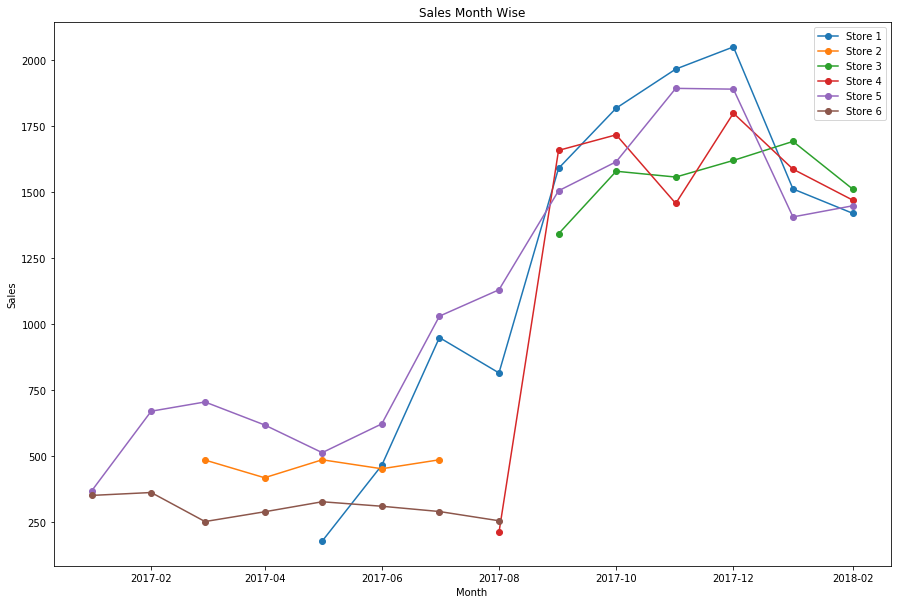

In [7]:
plt.figure(figsize=(15,10))
labels = ['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6']
plt.plot(dk1['Sales Qty'],'-o')
plt.plot(dk2['Sales Qty'],'-o')
plt.plot(dk3['Sales Qty'],'-o')
plt.plot(dk4['Sales Qty'],'-o')
plt.plot(dk5['Sales Qty'],'-o')
plt.plot(dk6['Sales Qty'],'-o')
plt.legend(labels)
plt.title('Sales Month Wise')
plt.ylabel('Sales')
plt.xlabel('Month')

So from the plot above we can see that the sales for stores are maximum in the last 4 months. There's a sudden increase
in the sales. To analyse it visually the sales for each and every month for every category sold by the stores are plotted.

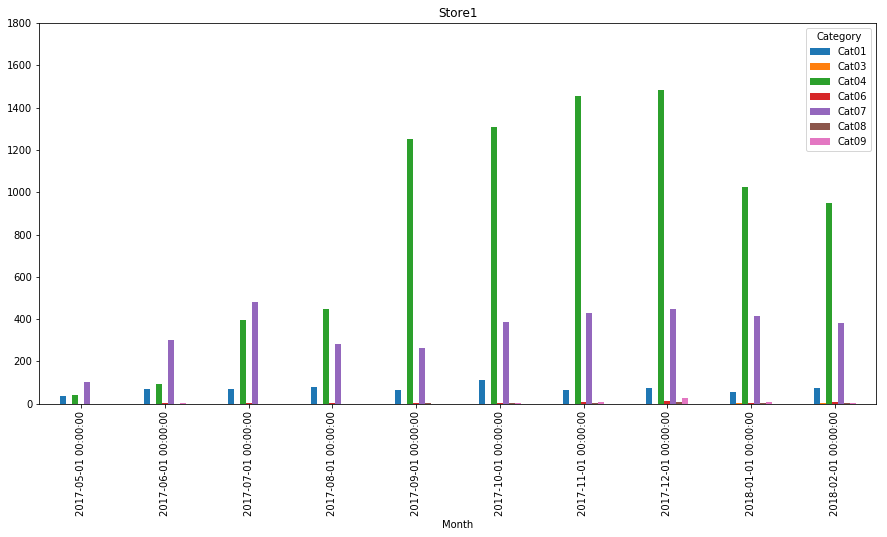

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
dat1 = shopA1.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store1')
plt.ylim([0,1800])
dat1 = shopA1.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat1['sales'] = dk1['Sales Qty']

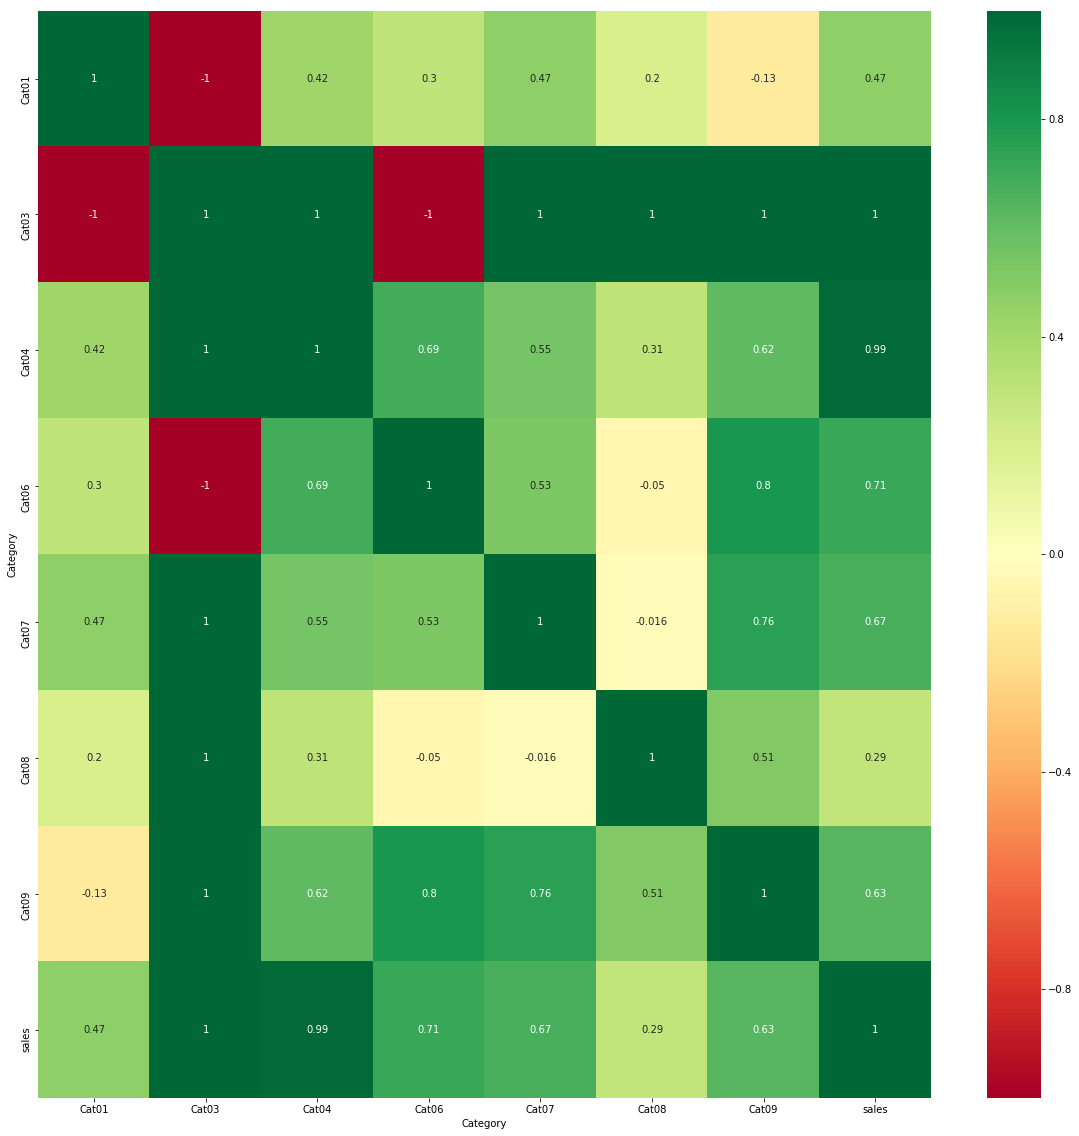

In [9]:

corrmat = dat1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

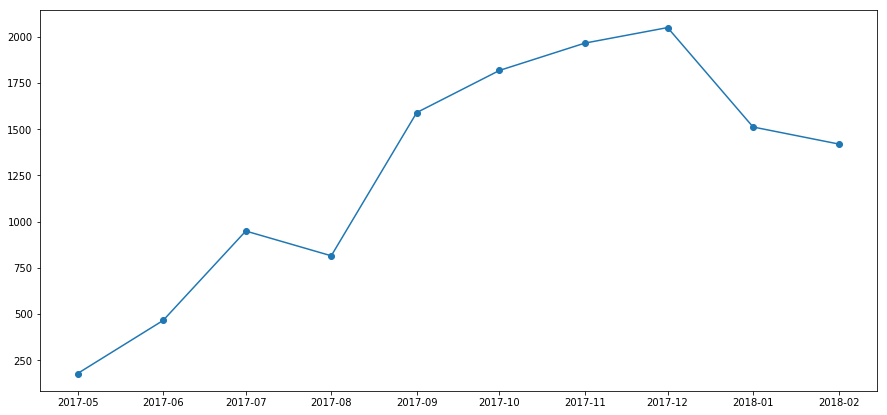

In [10]:
plt.figure(figsize=(15,7))
plt.plot(dk1['Sales Qty'],'-o')

From the above heatmap we can get that increase in Cat04 products sale has resulted in increase in the sales for Store4

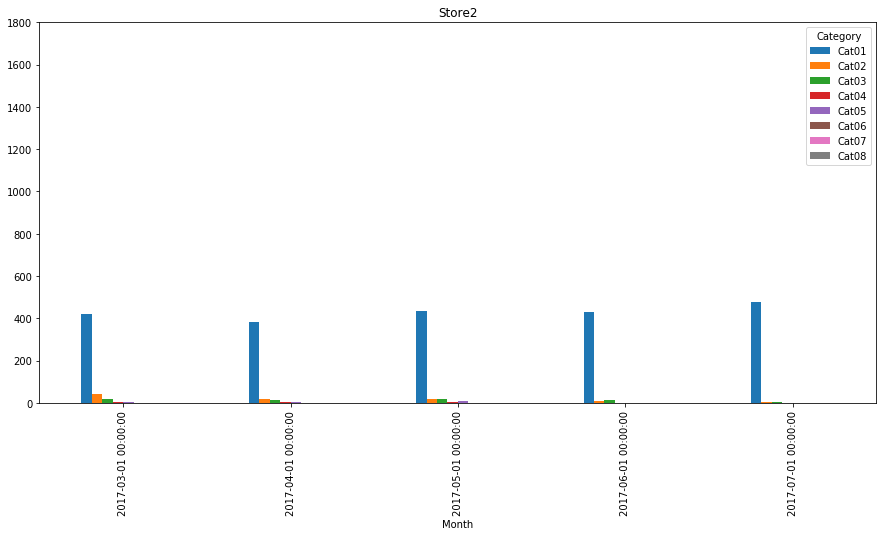

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
dat2 = shopA2.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store2')
plt.ylim([0,1800])
dat2 = shopA2.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat2['sales'] = dk2['Sales Qty']

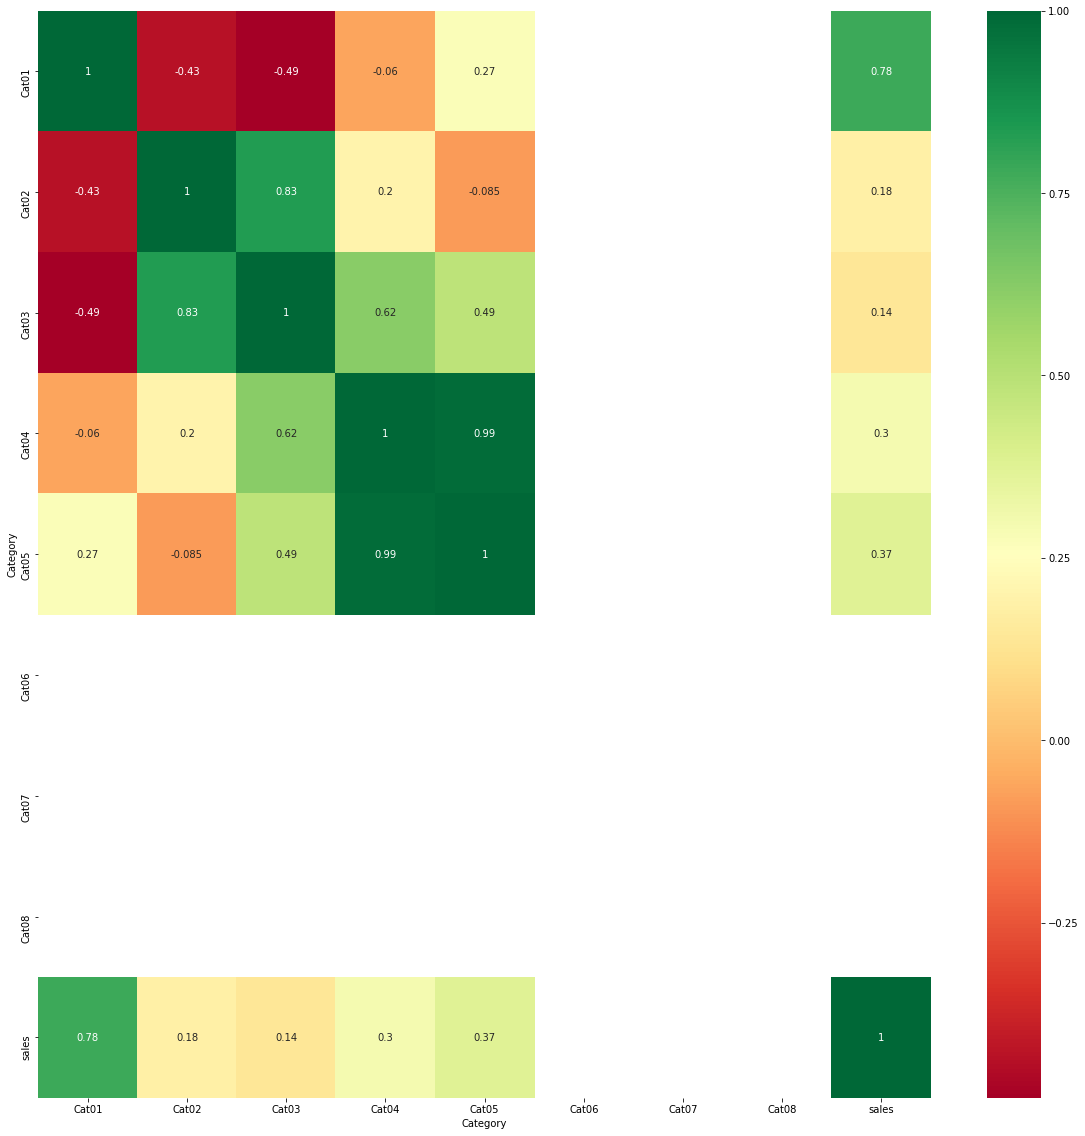

In [12]:

corrmat = dat2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat2[top_corr_features].corr(),annot=True,cmap="RdYlGn")


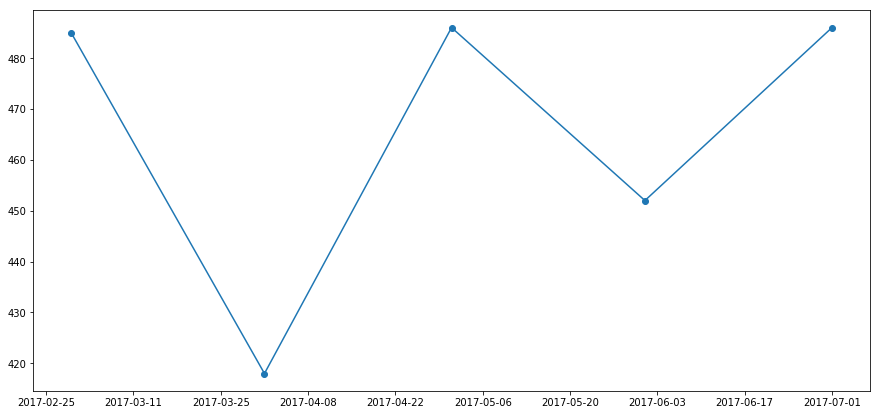

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(dk2['Sales Qty'],'-o')

Cat01 has played that role for Store2.

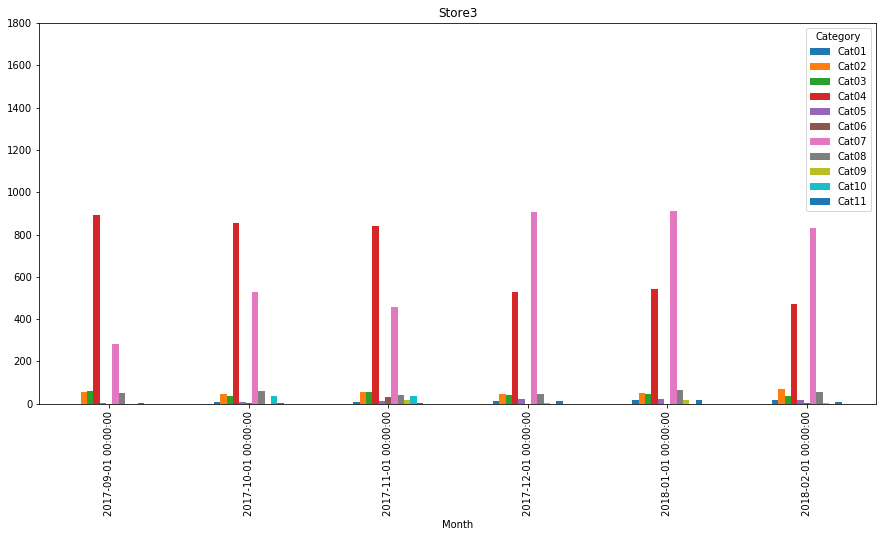

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
dat3 = shopA3.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store3')
plt.ylim([0,1800])
dat3 = shopA3.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat3['sales'] = dk3['Sales Qty']


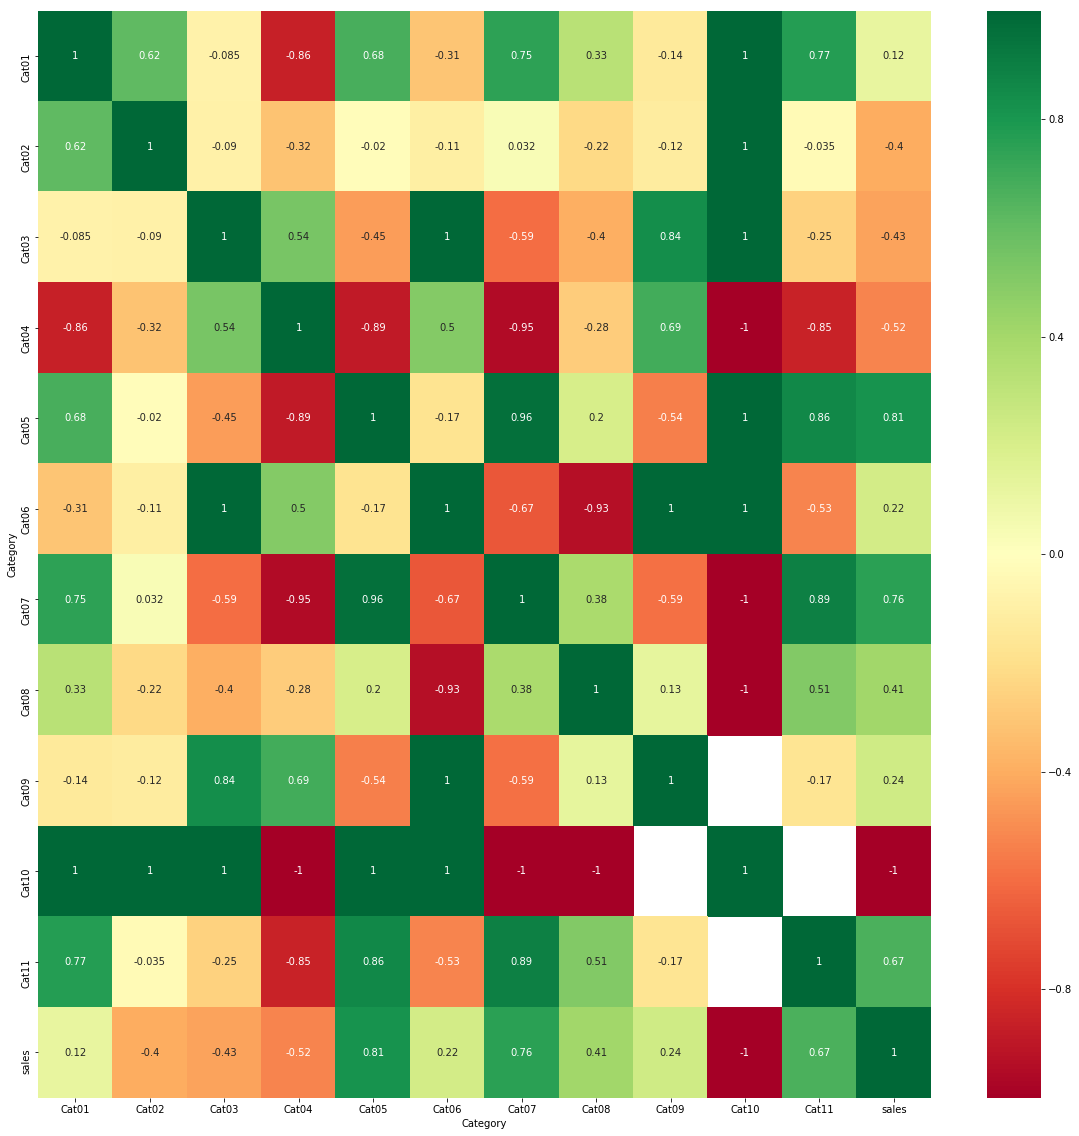

In [15]:
corrmat = dat3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

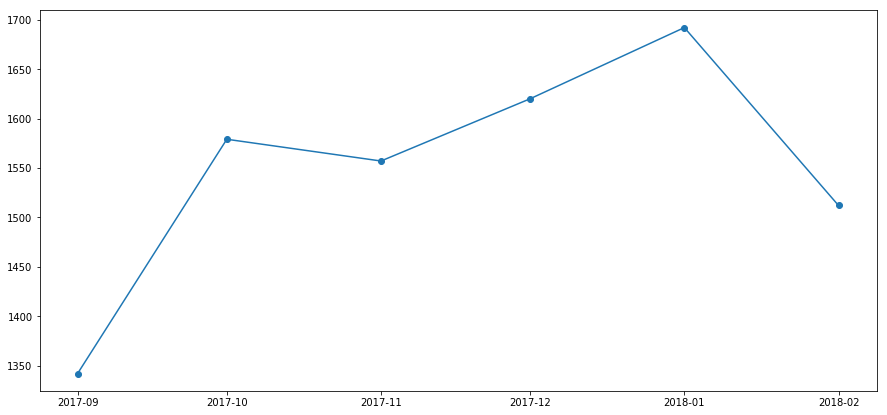

In [16]:

plt.figure(figsize=(15,7))
plt.plot(dk3['Sales Qty'],'-o')

Likewise we can get the idea of which Category is contributing for the particular sale.

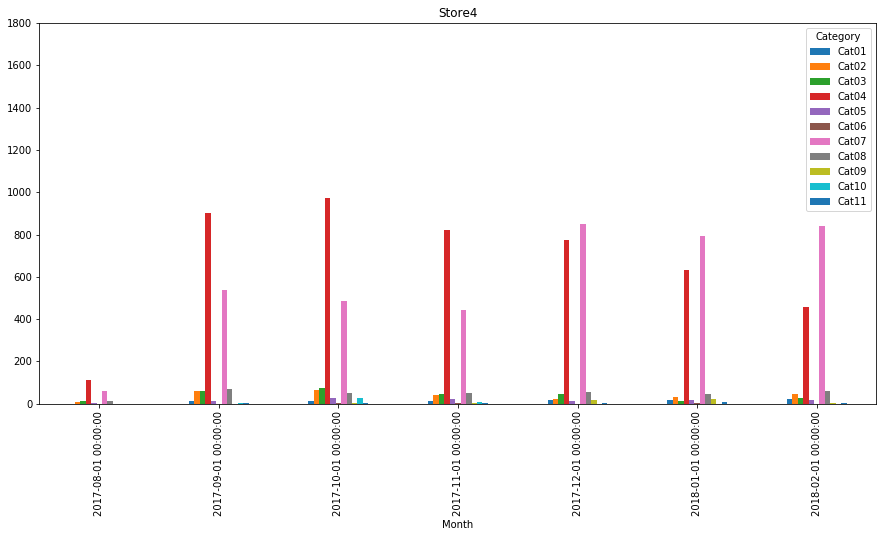

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
dat4 = shopA4.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store4')
plt.ylim([0,1800])
dat4 = shopA4.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat4['sales'] = dk4['Sales Qty']

#plot heat map

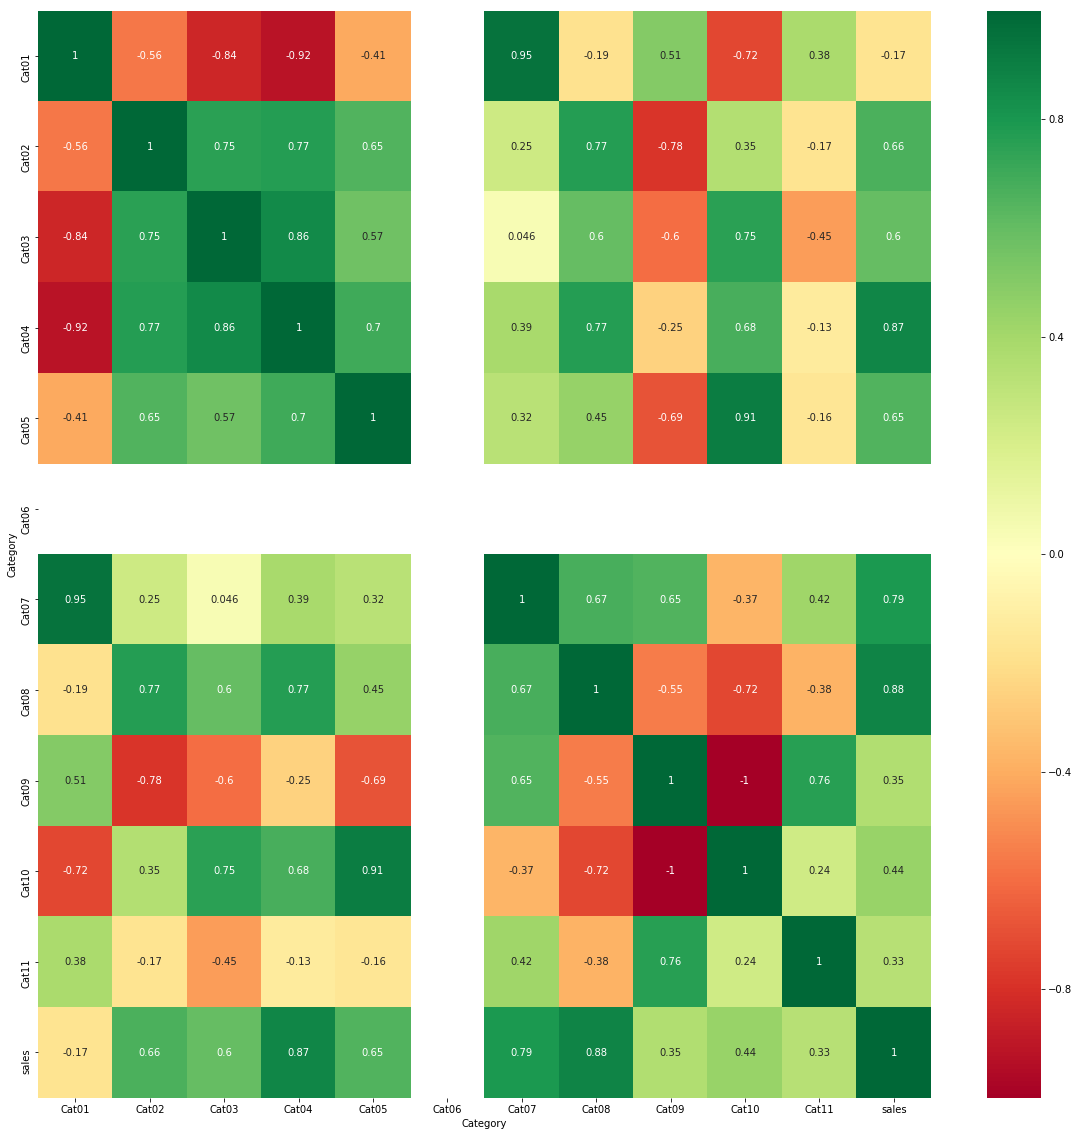

In [18]:
corrmat = dat4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dat4[top_corr_features].corr(),annot=True,cmap="RdYlGn")


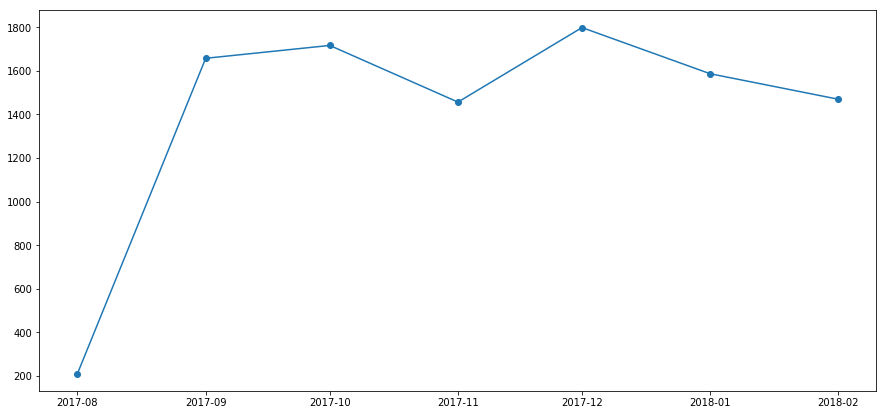

In [19]:
plt.figure(figsize=(15,7))
plt.plot(dk4['Sales Qty'],'-o')

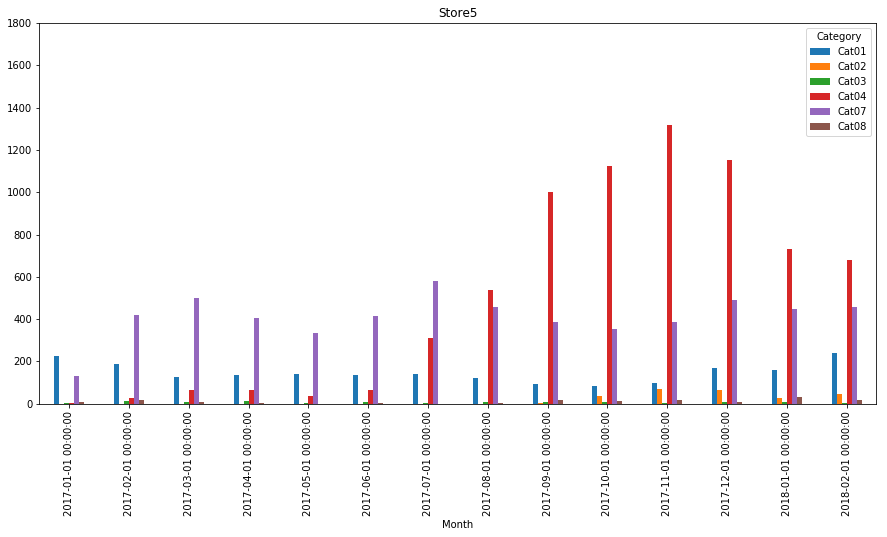

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
dat5 = shopA5.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store5')
plt.ylim([0,1800])
dat5= shopA4.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat5['sales'] = dk5['Sales Qty']

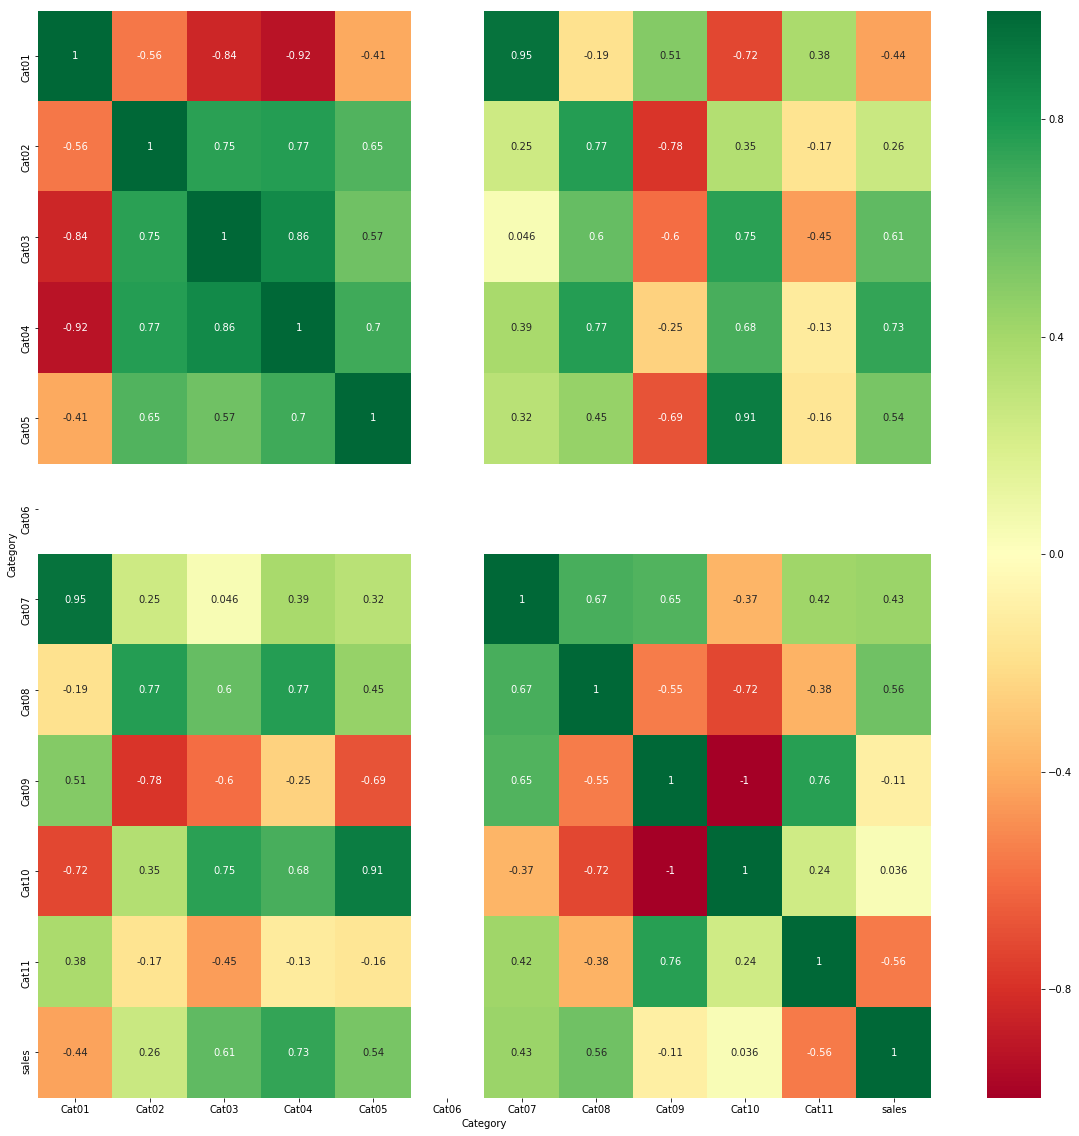

In [21]:

corrmat = dat5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat5[top_corr_features].corr(),annot=True,cmap="RdYlGn")


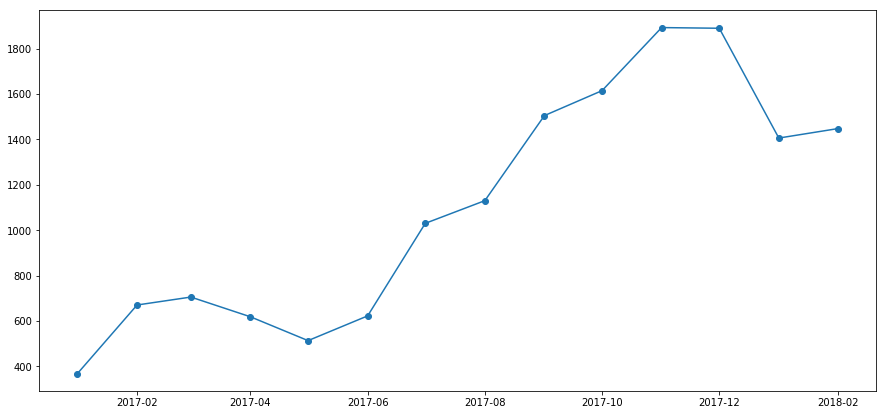

In [22]:
plt.figure(figsize=(15,7))
plt.plot(dk5['Sales Qty'],'-o')

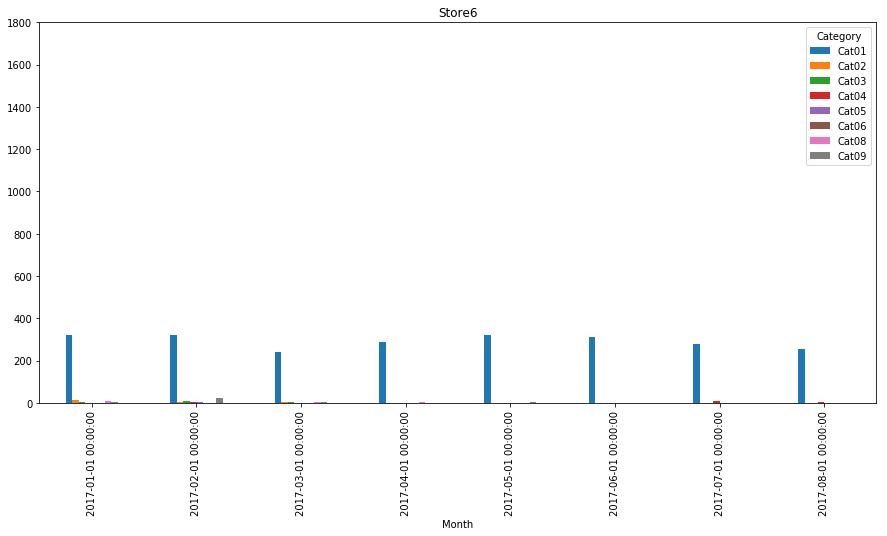

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
dat6 = shopA6.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.title('Store6')
plt.ylim([0,1800])
dat6 = shopA6.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat6['sales'] = dk6['Sales Qty']


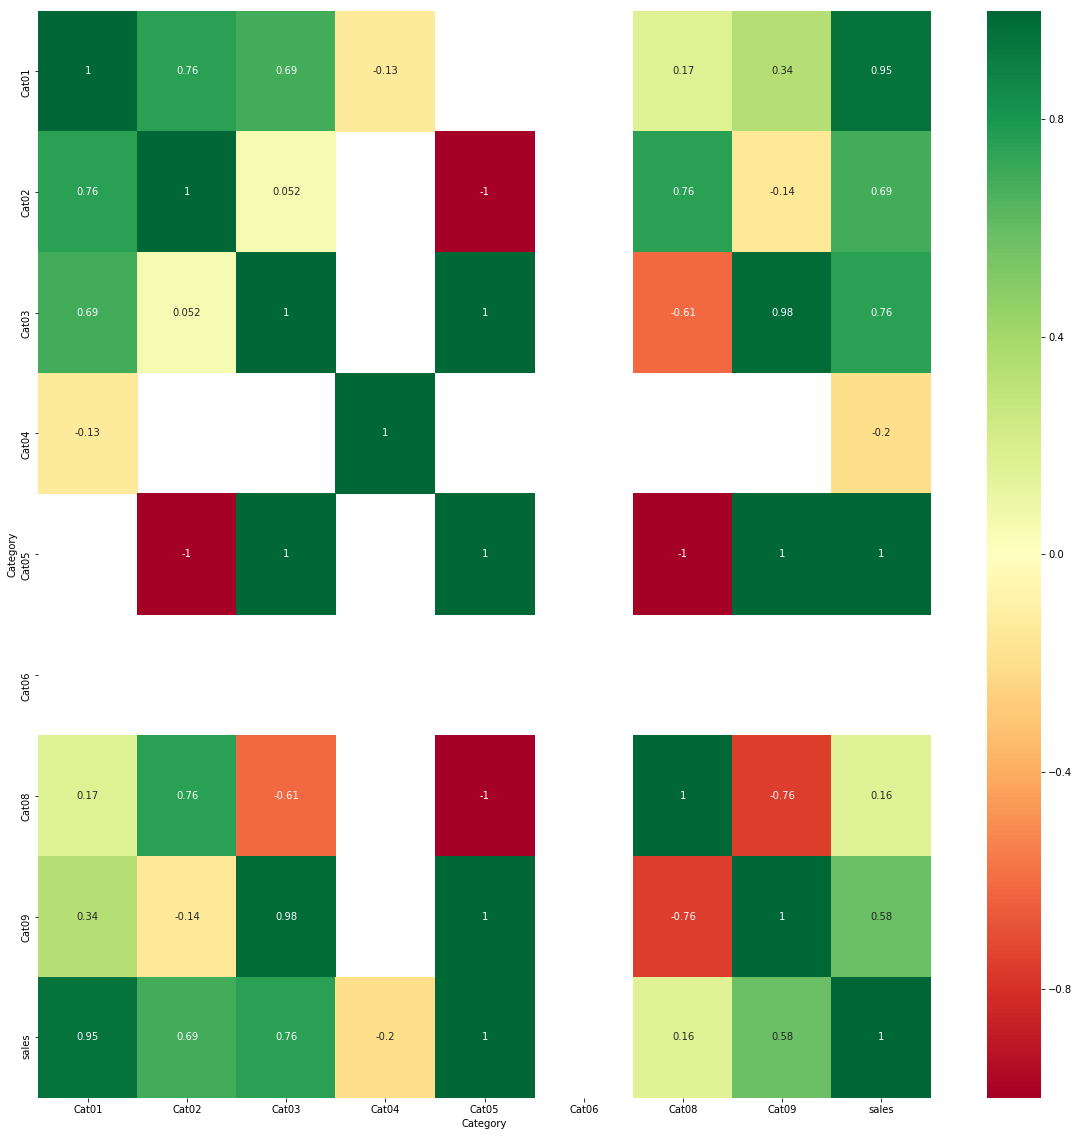

In [24]:
corrmat = dat6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dat6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

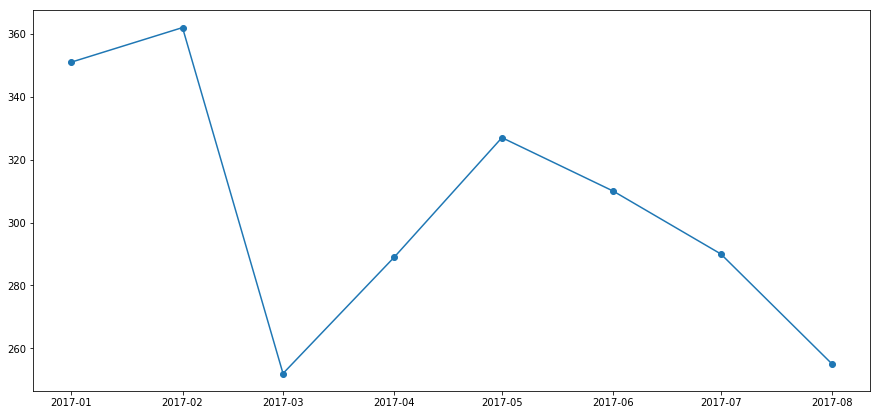

In [25]:

plt.figure(figsize=(15,7))
plt.plot(dk6['Sales Qty'],'-o')

Category,Cat01,Cat02,Cat03,Cat04,Cat05,Cat06,Cat07,Cat08,Cat09,Cat10,Cat11
Month,,,,,,,,,,,
2017-01-01,546.0,12.0,8.0,1.0,1.0,NaN,132.0,16.0,3.0,NaN,NaN
2017-02-01,512.0,6.0,22.0,31.0,3.0,NaN,418.0,19.0,21.0,NaN,NaN
2017-03-01,786.0,45.0,32.0,65.0,2.0,NaN,498.0,12.0,2.0,NaN,NaN
2017-04-01,807.0,17.0,25.0,65.0,3.0,1.0,404.0,3.0,NaN,NaN,NaN
2017-05-01,935.0,18.0,19.0,82.0,7.0,-1.0,440.0,NaN,4.0,NaN,NaN
2017-06-01,939.0,9.0,20.0,156.0,1.0,5.0,715.0,2.0,2.0,NaN,NaN
2017-07-01,968.0,3.0,8.0,716.0,NaN,1.0,1059.0,NaN,NaN,NaN,NaN
2017-08-01,456.0,9.0,18.0,1103.0,3.0,0.0,802.0,20.0,NaN,NaN,NaN
2017-09-01,171.0,117.0,123.0,4047.0,15.0,4.0,1471.0,138.0,NaN,4.0,5.0


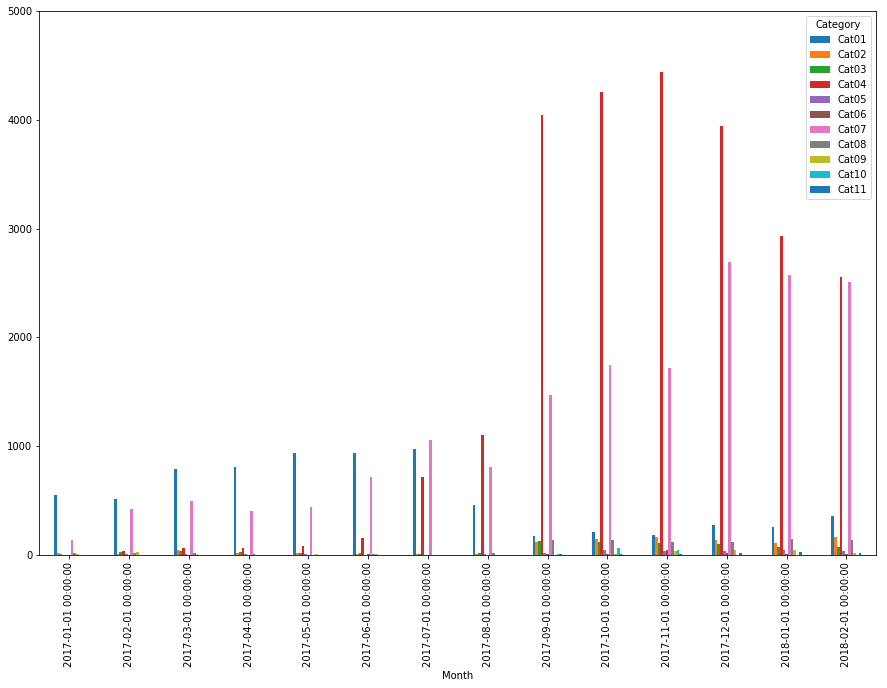

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
dat4 = all_shops.groupby(['Month','Category']).sum()['Sales Qty'].unstack().plot(kind='bar',ax=ax)
plt.ylim([0,5000])
dat4 = all_shops.groupby(['Month','Category']).sum()['Sales Qty'].unstack()
dat4

So a sudden increase in the Cat04 has caused the increase in the sales. Over the month.

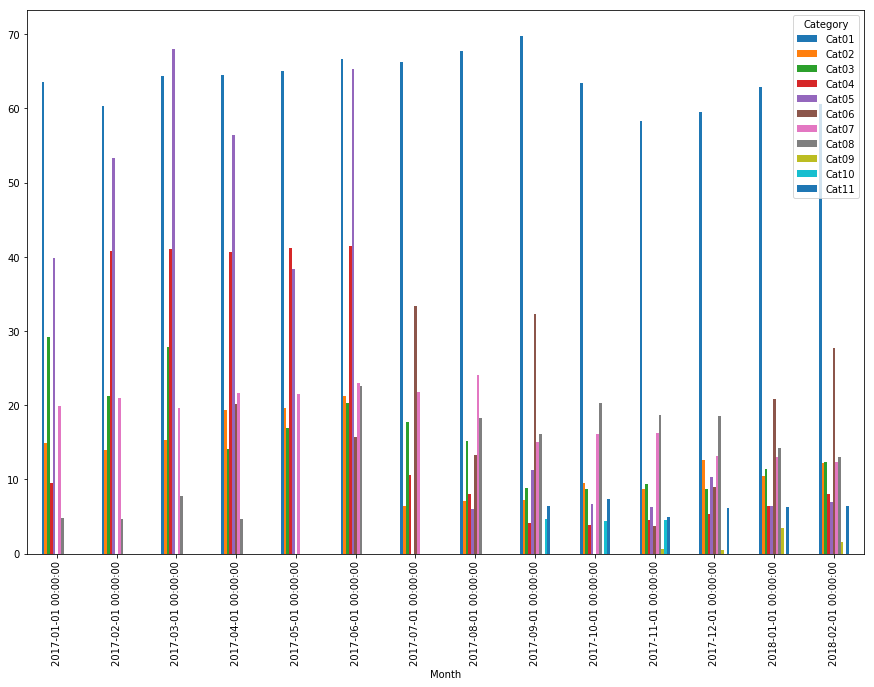

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
dat4 = all_shops.groupby(['Month','Category']).mean()['Sales Price'].unstack().plot(kind='bar',ax=ax)

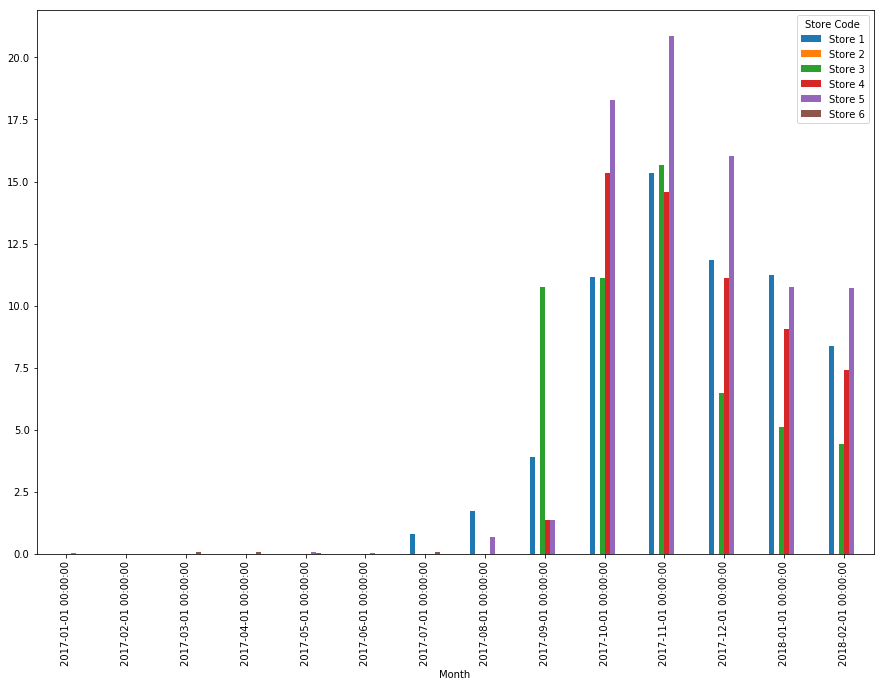

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
dat4 = all_shops.groupby(['Month','Store Code']).mean()['Discount Percent'].unstack().plot(kind='bar',ax=ax)

Simple logical inference that can be drawn from this is that the increase in discount has caused an increase in Sales.

Likewise, the increase in discount has caused a decrease in sales price leading to a substantial increase in the sales in those particular months.

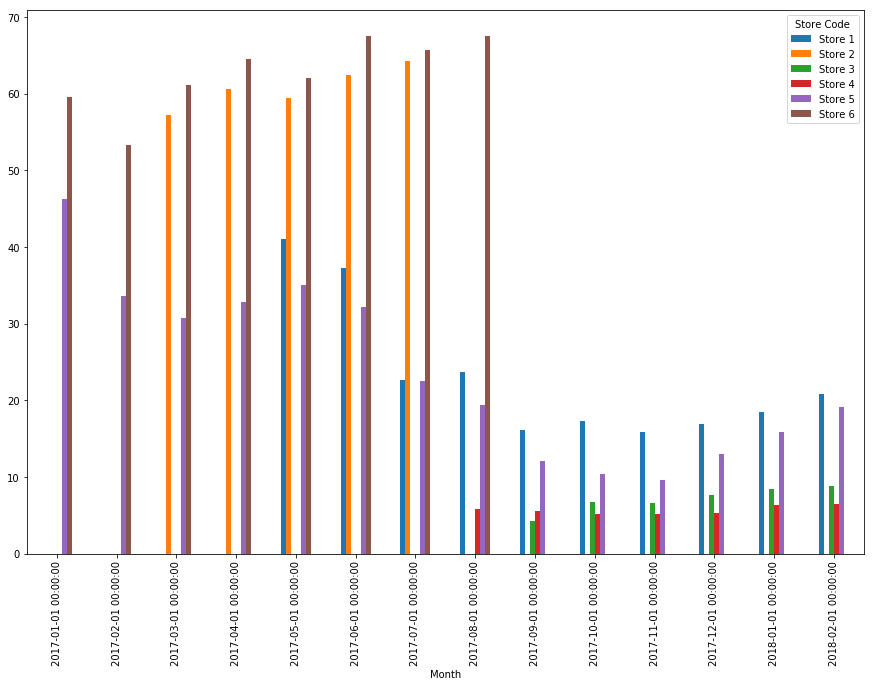

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
dat4 = all_shops.groupby(['Month','Store Code']).mean()['Sales Price'].unstack().plot(kind='bar',ax=ax)

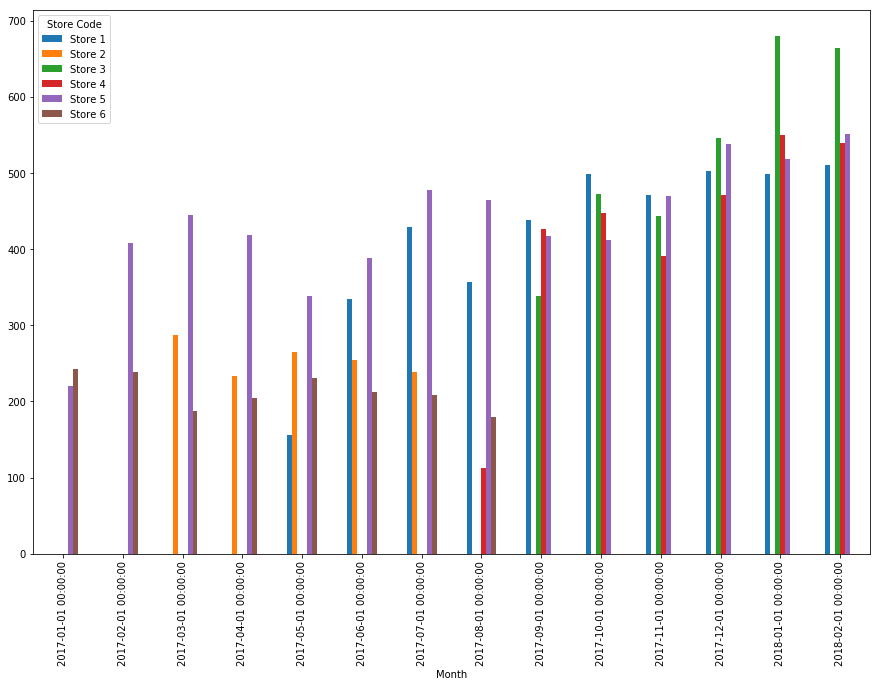

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
dat_sku = all_shops.groupby(['Month','Store Code'])['SKU Code'].nunique().unstack().plot(kind='bar',ax=ax)
dat_sku = all_shops.groupby(['Month','Store Code'])['SKU Code'].nunique().unstack()

Checking the similarity between the number of SKU sold and sales of that particular store.

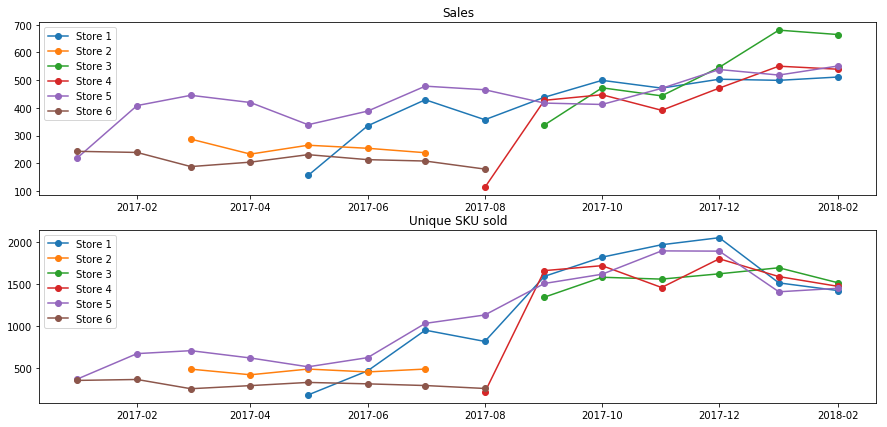

In [31]:
labels=['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6']

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.title('Sales')
plt.plot(dat_sku['Store 1'],'-o')
plt.subplot(212)
plt.title('Unique SKU sold')
plt.plot(dk1['Sales Qty'],'-o')
plt.subplot(211)
plt.plot(dat_sku['Store 2'],'-o')
plt.subplot(212)
plt.plot(dk2['Sales Qty'],'-o')
plt.subplot(211)
plt.plot(dat_sku['Store 3'],'-o')
plt.subplot(212)
plt.plot(dk3['Sales Qty'],'-o')
plt.subplot(211)
plt.plot(dat_sku['Store 4'],'-o')
plt.subplot(212)
plt.plot(dk4['Sales Qty'],'-o')
plt.subplot(211)
plt.plot(dat_sku['Store 5'],'-o')
plt.subplot(212)
plt.plot(dk5['Sales Qty'],'-o')

plt.subplot(211)
plt.plot(dat_sku['Store 6'],'-o')
plt.legend(labels)
plt.subplot(212)
plt.plot(dk6['Sales Qty'],'-o')
plt.legend(labels)

So the relation can be found out if required.